# Chapter 11 - Graphs and Other Algorithms

## Graph
A graph G is an ordered pair of a set V of vertices and a set E of edges given as G = (V, E) in formal mathematical notation.

**Example:**<br>
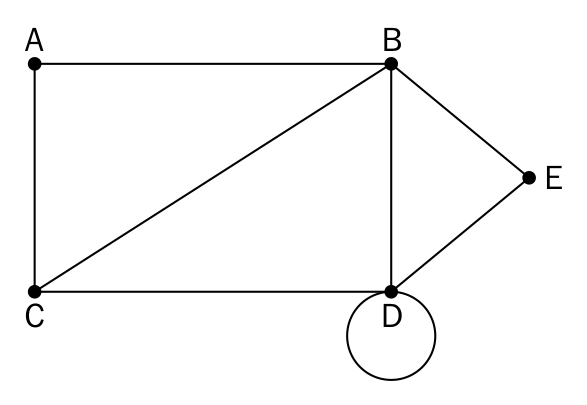

### Node or vertex 
A point, usually represented by a dot in a graph. The vertices or nodes are A, B, C, D, and E.
### Edge
This is a connection between two vertices. The line connecting A and B is an example of an edge.
### Loop
When an edge from a node is incident on itself, that edge forms a loop.
### Degree of a vertex
This is the number of vertices that are incident on a given vertex. The degree of vertex B is 4.
### Adjacency
This refers to the connection(s) between a node and its neighbor. The node C is adjacent to node A because there is an edge between them.
### Path
A sequence of vertices where each adjacent pair is connected by an edge.

## Directed and Undirected Graphs
### Undirected Graph
An undirected graph simply represents edges as lines between the nodes. There is no additional information about the relationship between the nodes than the fact that they are connected.

**Example:**<br>
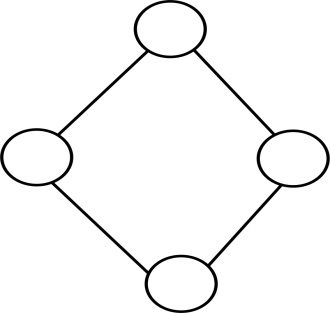

### Directed Graph
In a directed graph, the edges provide orientation in addition to connecting nodes. That is, the edges, which will be drawn as lines with an arrow, will point in which direction the edge connects the two nodes.

**Example:**<br>
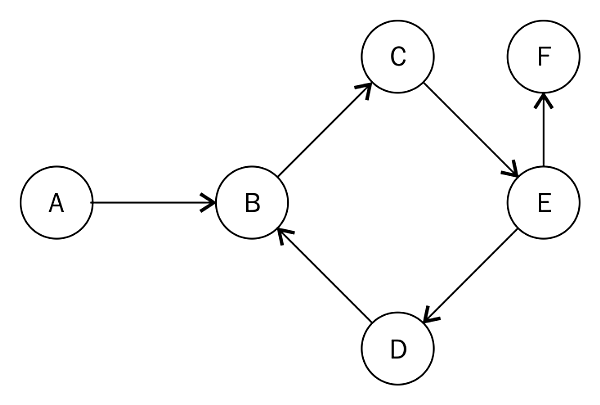

The arrow of an edge determines the flow of direction. One can only move from A to B in the preceding diagram. Not B to A.

### Weighted Graphs
A weighted graph adds a bit of extra information to the edges. This can be a numerical value that indicates something.

**Example:**<br>
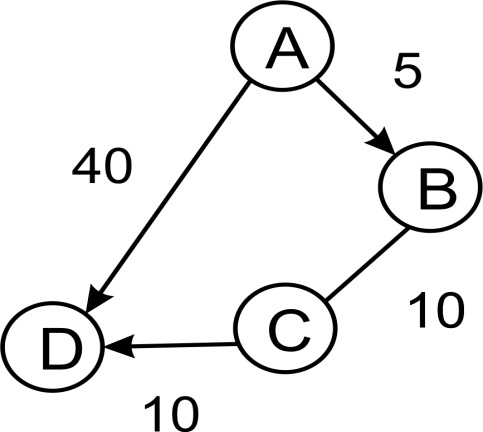

In this example, AD and ABCD represent two different paths. A path is simply a sequence of edges that you pass through between two nodes. Following these paths, you see that the total journey AD takes 40 minutes, whereas the journey ABCD takes 25 minutes. If your only concern is time, you would be better off traveling along ABCD, even with the added inconvenience of changing buses.

## Graph Representation
Graphs can be represented in two main forms:
- Adjacency matrix
- Adjacency list.

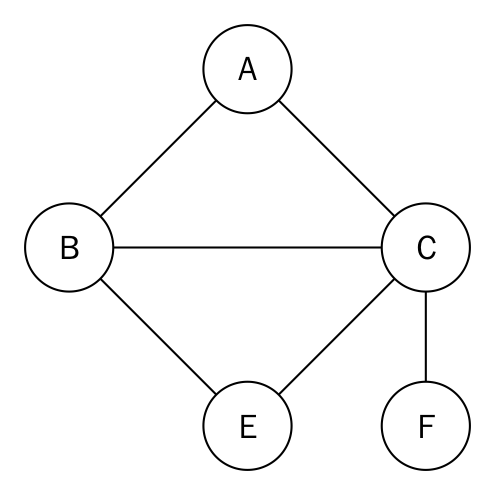

## Adjacency List
List can be used to present a graph. Indicies represents the nodes or the verticies in the graph. At each index, the ajdacent nodes to that vertex can be stored:<br>
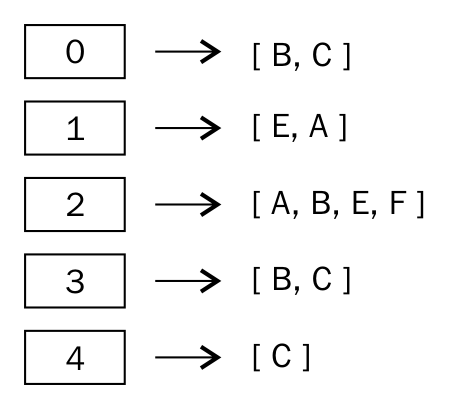

Using lists is quite restrictive as we lack the ability to use vertex labels. A dictionary is, hence, more suited.

In [2]:
graph = dict()
graph['A'] = ['B', 'C']
graph['B'] = ['E', 'A']
graph['C'] = ['A', 'B', 'E', 'F']
graph['E'] = ['B', 'C']
graph['F'] = ['C']

### Adjacency Matrix
A matrix is a two-dimensional array. The idea here is to represent the cells with a 1 or 0 depending on whether two vertices are connected by an edge.

In [17]:
matrix_elements = sorted(graph.keys())
cols = rows = len(matrix_elements)
matrix_elements

['A', 'B', 'C', 'E', 'F']

In [7]:
adjacency_matrix = [[0 for x in range(rows)] for y in range(cols)]
edges_list = []

In [8]:
adjacency_matrix

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [9]:
for key in matrix_elements:
    for neighbor in graph[key]:
        edges_list.append((key, neighbor))

In [11]:
edges_list

[('A', 'B'),
 ('A', 'C'),
 ('B', 'E'),
 ('B', 'A'),
 ('C', 'A'),
 ('C', 'B'),
 ('C', 'E'),
 ('C', 'F'),
 ('E', 'B'),
 ('E', 'C'),
 ('F', 'C')]

In [14]:
for edge in edges_list:
    index_of_first_vertex = matrix_elements.index(edge[0])
    index_of_second_vertex = matrix_elements.index(edge[1])
    adjacency_matrix[index_of_first_vertex][index_of_second_vertex] = 1

In [15]:
adjacency_matrix

[[0, 1, 1, 0, 0],
 [1, 0, 0, 1, 0],
 [1, 1, 0, 1, 1],
 [0, 1, 1, 0, 0],
 [0, 0, 1, 0, 0]]

## Graph Traversal

Traversal normally involves keeping track of which nodes or vertices have already been visited and which ones have not. A common strategy is to follow a path until a dead end is reached, then walking back up until there is a point where there is an alternative path. We can also iteratively move from one node to another in order to traverse the full graph or part of it.

## Breadth-first Search
The breadth-first search algorithm starts at a node, chooses that node or vertex as its root node, and visits the neighboring nodes, after which it explores neighbors on the next level of the graph.

Consider undirected Graph:
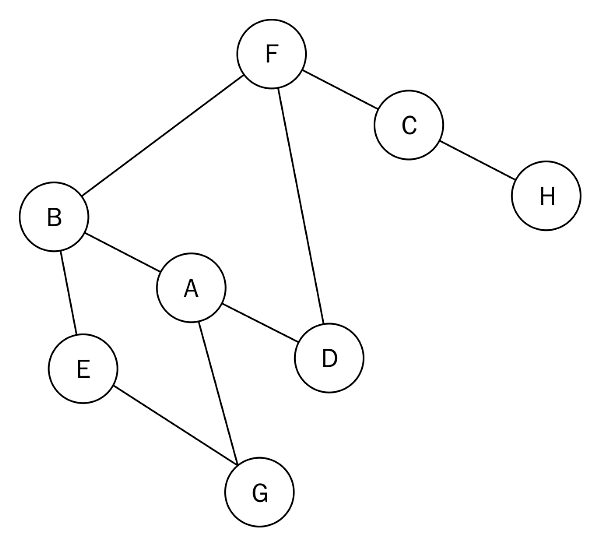

Adjacency List:

In [46]:
graph=dict()
graph['A'] = ['B', 'D', 'G']
graph['B'] = ['F', 'A', 'E']
graph['C'] = ['F', 'H']
graph['D'] = ['F', 'A']
graph['E'] = ['B', 'G']
graph['F'] = ['B', 'D', 'C']
graph['G'] = ['A', 'E']
graph['H'] = ['C']

In trying to traverse this graph breadth first, we will employ the use of a queue.

Starting at node A:
- A is added to list of visited nodes.
- Then we use while loop to effect traversal of the graph.
    - In while loop, B is dequeued. 
    - Its unvisited adjacent nodes B, G and D are sorted and queued up. 
    - These are also added to list of visited nodes.
    - Now, we will also start another iteration of while loop, as the queue is not empty.
- Node B is Dequeued.
    - In its adjacent nodes, A has already been visited.
    - Therefore, we only queue E and F.
    - We add them to the list of visited nodes. 
    
Our queue now holds the following nodes at this point: D, G, E and F. The list of visited nodes contains A, B, D, G, E, F.

- Node D is dequeued, but all its adjacent nodes have already been visited, so we just dequeue it. 
- The next node at the front of the queue is G, which is same as D.
- Same for E.
- F is dequeued, and out of its adjacent nodes, only C has not been visited.
- Enqueue C, add it to visited nodes. 
    - C is dequeued, but its adjacent node H has not been visited. 
- Go to H, add it to the visited nodes. 

Output: A, B, D, G, E, F, C, H,

Code:

In [23]:
from collections import deque

def breadth_first_search(graph, root):
    visited_vertices = list()
    graph_queue = deque([root])
    visited_vertices.append(root)
    node=root
    while len(graph_queue) > 0:
        node = graph_queue.popleft()
        adj_nodes = graph[node]
        remaining_elements = set(adj_nodes).difference(set(visited_vertices))
        if len(remaining_elements) > 0:
            for element in sorted(remaining_elements):
                visited_vertices.append(element)
                graph_queue.append(element)
    return visited_vertices

In [24]:
breadth_first_search(graph, 'A')

['A', 'B', 'D', 'G', 'E', 'F', 'C', 'H']

Time Complexity: In the worst-case scenario, each vertex or node and edge will be traversed, thus the time complexity of the algorithm is O(|V| + |E|), where |V| is the number of vertices or nodes while |E| is the number of edges in the graph.

My Code:

In [36]:
def bfs(graph, root):
    visited=list()
    queue=deque([root])
    visited.append(root)
    while len(queue)>0:
        node = queue.popleft()
        adjacent=graph[node]
        remaining=set(adjacent).difference(set(visited))
        for element in sorted(remaining):
            queue.append(element)
            visited.append(element)
    return visited

In [37]:
bfs(graph, 'A')

['A', 'B', 'D', 'G', 'E', 'F', 'C', 'H']

In [39]:
bfs(graph, 'A') == breadth_first_search(graph, 'A')

True

## Depth-first Search

This algorithm traverses the depth of any particular path in the graph before traversing its breadth. As such, child nodes are visited first before sibling nodes. It works on finite graphs and requires the use of a stack to maintain the state of the algorithm.

In [4]:
def depth_first_search(graph, root):
    visited_vertices = list()
    graph_stack = list()
    graph_stack.append(root)
    node=root
    while len(graph_stack) > 0: 

        if node not in visited_vertices: 
            visited_vertices.append(node) 

        adj_nodes = graph[node] 


        if set(adj_nodes).issubset(set(visited_vertices)): 
            graph_stack.pop() 
            if len(graph_stack) > 0: 
                node = graph_stack[-1] 
            continue 
        else: 
            remaining_elements = set(adj_nodes).difference(set(visited_vertices))
            first_adj_node = sorted(remaining_elements)[0]
            graph_stack.append(first_adj_node) 
            node = first_adj_node
    return visited_vertices

In [5]:
depth_first_search(graph, 'A')

['A', 'B', 'S', 'C', 'D', 'E', 'H', 'G', 'F']

EXPLANATION: The body of the while loop will be executed provided the stack is not empty. If node is not in the list of visited nodes, we add it. All adjacent nodes to node are collected by adj_nodes = graph[node]. If all the adjacent nodes have been visited, we pop that node from the stack and set node to graph_stack[-1]. graph_stack[-1] is the top node on the stack. The continue statement jumps back to the beginning of the while loop's test condition.

If, on the other hand, not all the adjacent nodes have been visited, the nodes that are yet to be visited are obtained by finding the difference between the adj_nodes and visited_vertices with the statement remaining_elements = set(adj_nodes).difference(set(visited_vertices)).

The first item within sorted(remaining_elements) is assigned to first_adj_node, and pushed onto the stack. We then point the top of the stack to this node.

When the while loop exists, we will return the visited_vertices.


Consider:

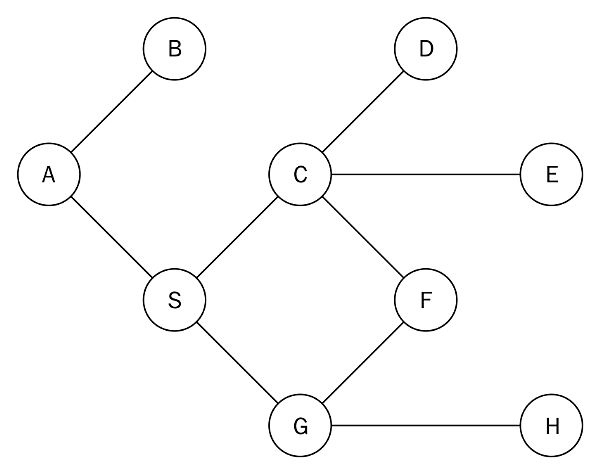

Adjacency List:

In [1]:
graph = dict()
graph['A'] = ['B', 'S'] 
graph['B'] = ['A'] 
graph['S'] = ['A','G','C'] 
graph['D'] = ['C'] 
graph['G'] = ['S','F','H'] 
graph['H'] = ['G','E'] 
graph['E'] = ['C','H'] 
graph['F'] = ['C','G'] 
graph['C'] = ['D','S','E','F']

- Node A is pushed onto the stack, added to visited list.
- We examine A's adjacent nodes B and S:
```
if set(adj_nodes).issubset(set(visited_vertices)): 
    graph_stack.pop() 
    if len(graph_stack) > 0: 
        node = graph_stack[-1] 
    continue 
```
    - If all nodes have been visited, we pop the top of the stack. 
    - If stack is not empty, we assign the node on the top of stack to `node` and start the beginning of another execution of while loop.
        - The statement ```set(adj_nodes).issubset(set(visited_vertices))``` will evaluate to True if all the nodes in `adj_nodes` are a subset of `visited_vertices`. If the if statement fails, it means that some nodes remain to be visited.
- We obtain remaining elements with ```set(adj_nodes).difference(set(visited_vertices))```. From the diagram, B and S will be stored in `remaining_elements`.
- We will acceses the list in alphabetical order:
```
“first_adj_node = sorted(remaining_elements)[0] 
graph_stack.append(first_adj_node) 
node = first_adj_node
```
- We sort remaining_elements and return the first node to first_adj_node. This will return B. We push node B onto the stack by appending it to the graph_stack. We prepare node B for access by assigning it to node.
    - On the next iteration of the while loop, we add node B to the list of visited nodes. We discover that the only adjacent node to B, which is A, has already been visited.
- Because all the adjacent nodes of B have been visited, we pop it off the stack, leaving node A as the only element on the stack. 
    - We return to node A and examine whether all of its adjacent nodes have been visited. The node A now has S as the only unvisited node. 
- We push S to the stack and begin the whole process again.

The output of the traversal is A-B-S-C-D-E-H-G-F.

Depth-first searches are used in solving maze problems, finding connected components, and finding the bridges of a graph, etc.

## Other useful graph methods

### Priority Queues and Heaps
A priority queue is basically a type of queue that will always return items in order of priority. Although called a queue, priority queues are often implemented using a heap, since it is very efficient for this purpose.

#### Heap
A heap is a data structure that satisfies the heap property. The heap property states that there must be a certain relationship between a parent node and its child nodes. This property must apply through the entire heap.

##### Min Heap
In a min heap, the relationship between parent and children is that the parent must always be less than or equal to its children. As a consequence of this, the lowest element in the heap must be the root node.

##### Max Heap
In a max heap, on the other hand, the parent is greater than or equal to its child or its children. It follows from this that the largest value makes up the root node.

Heaps are trees and, to be more specific, binary trees. Although we are going to use a binary tree, we will actually use a list to represent it. This is possible because the heap will store a complete binary tree.

#### Complete Binary Tree
A complete binary tree is one in which each row must be fully filled before starting to fill the next row.

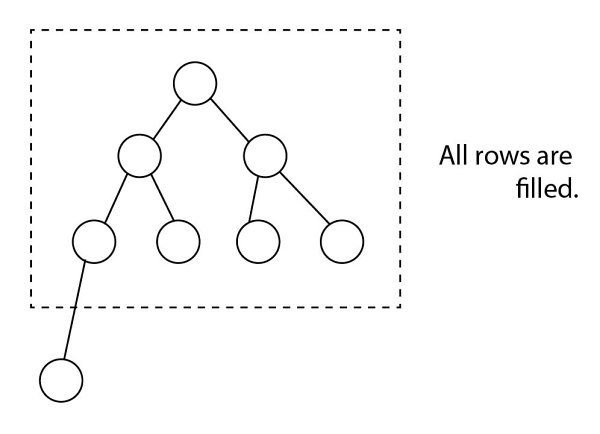

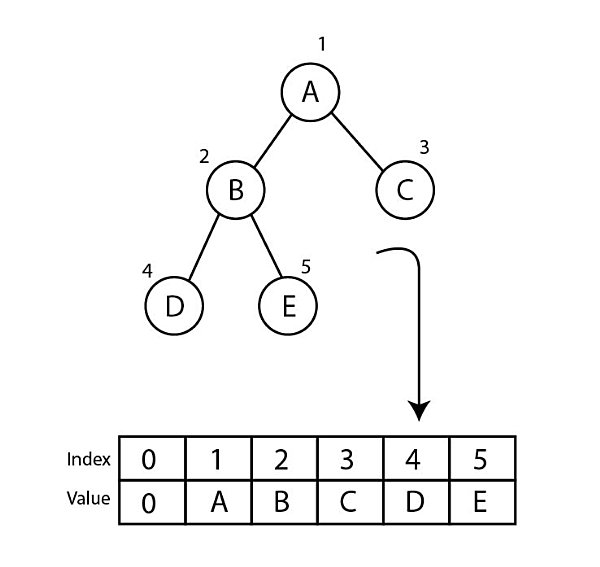

You can retrieve the children of any node n very easily. The left child is located at 2n and the right child is located at 2n + 1.

In [9]:
class Heap:
    # Initialize our heap list with a zero to represent the dummy first element
    def __init__(self):
        self.heap = [0]
        self.size = 0
        
    # Inserting
    def floatVal(self, k):
        while k//2 > 0:
            if self.heap[k] < self.heap[k//2]:
                self.heap[k], self.heap[k//2] = self.heap[k//2]
            k//=2
    
    def insert(self,item):
        self.heap.append(item)
        self.size+=1
        self.floatVal(self.size)
        
    def minindex(self, k):
        if k*2+1 > self.size:
            return k*2
        elif self.heap[k*2] < self.heap[k*2+1]:
            return k*2
        else:
            return k*2+1
    def sinl(self, k):
        while k*2 <= self.size:
            mi=self.minindex(k)
            if self.heap[k]>self.heap[mi]:
                self.heap[k], self.heap[mi] = self.heap[mi], self.heap[k]
            k = mi
    def pop(self):
        item = self.heap[1]
        self.heap[1] = self.heap[self.size]
        self.size-=1
        self.heap.pop()
        self.sink(1)
        return item

In [10]:
h = Heap()
for i in (4, 8, 7, 2, 9, 10, 5, 1, 3, 6): h.insert(i)

TypeError: cannot unpack non-iterable int object

## Selection Algorithms
Selection algorithms falls under a class of algorithms that find the ith-smallest element in a list.

When a list is sorted in ascending order, the first element in the list will be the smallest item in the list, second element the second-smallest element and last element the last-smallest element in the list aka largest element in the list.

Calling Heap's pop method will return the smallest element in the heap. The first element to pop off a min heap is the first-smallest element, the seventh element the seventh-smallest, and the ith pop will be the ith smallest element.

Selection algorithms have applications in filtering out noisy data, finding the median, smallest, and largest elements in a list, and can even be applied in computer chess programs.

# Summary
We studied:
- Graphs
    - Traversal
- Heaps
    - Priority Queues
    - iTh Smallest Element